# Data 301 Spring 2016
# Samantha Hsu, Charles Gels, Yash Mehra
## Question 2

This notebook consists of the results from the Community Discovery section of Lab 10.

In [7]:
%matplotlib inline   
    
import numpy as np    ### because we want to plot things stored in arrays
import matplotlib
import matplotlib.pyplot as plt
import seaborn        ### to make our plots look nice(r)
seaborn.set()
import correlations


In [12]:
ratingsFile = "jester-data-1.csv"

def load_ratings():
    with open(ratingsFile, 'r') as file:
        rows = []

        for line in file:
            ratings = line.split(",")
            rows.append(np.asarray(ratings, dtype = 'float'))

        rawRatingsTable = np.asarray(rows)
        # SPLIT RAW RATINGS MATRIX
        userActivityList = []
        rawRatingsList = []
        for row in range(rawRatingsTable.shape[0]):
            userActivityList.append(rawRatingsTable[row, 0])
            rawRatingsList.append(rawRatingsTable[row, 1:])
        userActivity = np.asarray(userActivityList)
        rawRatings = np.asarray(rawRatingsList)

        for row in range(rawRatings.shape[0]):
            for col in range(rawRatings.shape[1]):
                if rawRatings[row, col] == 99:
                    rawRatings[row, col] = 0

        return userActivity, rawRatings

In [13]:
userActivity, rawRatings = load_ratings()

In [23]:
def get_activeUsers():
    ratings = []
    actives = []
    # for user in user list that have rated all jokes
    for user in range(len(userActivity)):
        if userActivity[user] == 100:
            actives.append(user)

    for user in actives:
        ratings.append(rawRatings[user])

    return np.asarray(ratings)

In [24]:
activeUsers = get_activeUsers()

### Outlier Behaviors

To search for outlier behaviors, we defined the "majority" ratings for a joke by those ratings within 1 standard deviation of the mean. The example below shows the plotted ratings for joke 89, which has an average rating of 3.58183551598, found by lab10.py's avg_joke_ratings().

In [14]:
def data_plot_joke(jokeId):
    ratings = []
    for row in range(rawRatings.shape[0]):
        ratings.append(rawRatings[row, jokeId-1])
    ratings  = np.asarray(ratings)
    plt.plot(ratings, "ro")

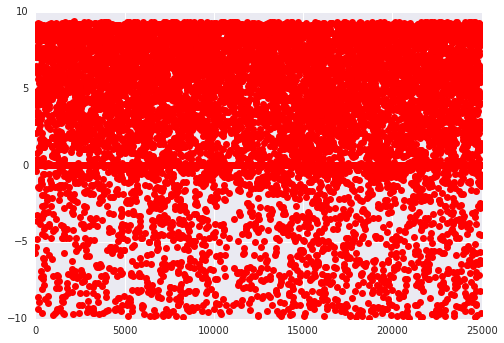

In [15]:
data_plot_joke(89)

So, we examined all 100 jokes and found the set of users that fell outside of the majority, and took the intersection of all of these sets. This found the few users who exhibited behaviors that were not exhibited by the majority of other users by finding the users whose ratings were consistently in the minority for every joke in the dataset. Our result for these outlier users were 10142, 14181, 15959, 22710, and 23467.

We also examined groups of users that showed very similar senses of humor. We categorized users who all seemed to have very easily amused personalities and extrapolated users 3358, 4114, 7931, 10142, 11886, 12099, 13897, 13926, 14181, 18024, 22710, and 23467. These users on average rated all jokes very highly, within the upper 10th percentile of the range of average user ratings. We also categorized users who seemed to have no sense of humor, who gave on average very low ratings for all jokes, within the lower 10th percentile of the range of average user ratings. The users we extracted are users 9359, 13754, and 16121.

### Simple Linear Regression

We also used simple linear regression to find sets of users that exhibited similar senses of humor by finding users that had a positive correlation to certain users. For instance, looking at the activeUsers array of users that have rated all 100 jokes, user 8 has strong positive correlations to users 6706, 8037, 15120, 21396, 22181, 24653, and 24893. There are 1806 sets of these relationships amongst users. Exploring the resulted dictionary, it can be seen that there is a huge network that reaches throughout all of the users. User 6706 has a positive correlation to user 8, and is also in 34 other users’ positive correlation sets, including users 38, 121, 257, 404, 1097, and 1265.

In [26]:
def slr(sample1, sample2):
    ### output values:
    alpha = 0
    beta = 0
    error = 0
    
    n = len(sample1)
    num1 = 0
    denom1 = 0
    X_i = 0
    Y_i = 0
    
    Xi_Yi = np.multiply(sample1, sample2)
    for i in range(len(Xi_Yi)):
        num1 += Xi_Yi[i]
    
    for i in range(sample2.shape[0]):
        Y_i += sample2[i]
        
    for i in range(sample1.shape[0]):
        X_i += sample1[i]
        
    num2 = (1/n) * Y_i * X_i
    
    X_i2 = np.square(sample1)
    for i in range(len(X_i2)):
        denom1 += X_i2[i]
    
    denom2 = (1/n) * (X_i ** 2)
    
    beta = (num1 - num2) / (denom1 - denom2)
    
    alpha = (1/n) * (Y_i - (beta * X_i))
    
    for i in range(sample1.shape[0]):
        error += (sample2[i] - (beta * sample1[i] + alpha)) ** 2
    
    return beta, alpha, error

In [17]:
def commonUsers(ratings1, ratings2):
    rt1 = []
    rt2 = []
    
    for i in range(ratings1.shape[0]):
        if ratings1[i] != 99 and ratings2[i] != 99:
            rt1.append(ratings1[i])
            rt2.append(ratings2[i])
            
    return np.asarray(rt1), np.asarray(rt2)    

In [16]:
def userPair(u1, u2):
    r1, r2 = commonUsers(u1, u2)
    
    ### let us compute the regression
    beta, alpha, sse = slr(r1,r2)
    print(beta)
    #### And now we plot

    ### Matplotlib operations

    plt.xlim(-12,12)    ### set the X axis from -10 to 10
    plt.ylim(-12,12)    ### set the Y axist from -10 to 10

    x = np.linspace(-12, 12, 2000)   ## create X values for the linear plot of the regression line
    plt.plot(x, beta*x+alpha, color="green") ## draw the regression line
    plt.scatter(r1,r2)

0.91677120619


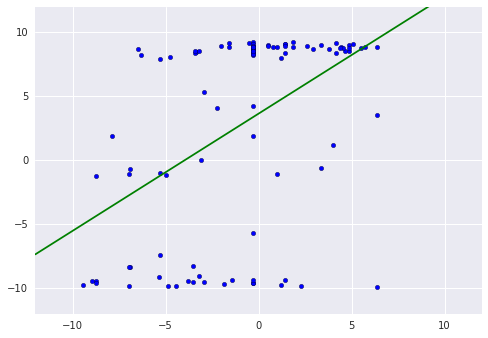

In [29]:
userPair(activeUsers[3], activeUsers[1918])

0.901374884741


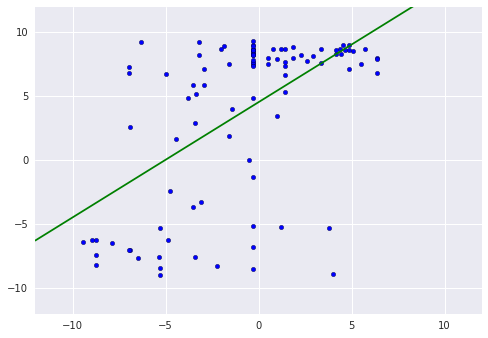

In [30]:
userPair(activeUsers[3], activeUsers[2319])

The above examples prove the positive correlations between user 8 to user 6706 and also to user 8037.